###### Material desenvolvido para o minicurso: Introdução à solução numérica de EDP's, ministrado no ERMAC/2018 de 5 a 6 de abril de 2018 na Universidade Federal de Lavras, Lavras/MG, Brasil. Autor: [Jonas Laerte Ansoni](http://jonasansoni.blogspot.com.br/).

<img src="./figuras/logoemarc.png" width="30%">

# <center> Minicurso:<font color='blue'> Introdução à solução numérica de EDP's

## <center> Equação parabólica
    
### 3.2. Equação transiente de difusão de calor    
######  Olhar Fortuna página 172

A equação clássica para problemas parabólicos é a equação transiente de difusão de calor:

\begin{equation}
\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2}
\tag{1}
\end{equation}

onde, $\alpha$ é o ceficiente de difusividade térmica (propriedade do material), e $T$ é a temperatura.

No _notebook_ anterior, nós discretizamos a equação de difusão com o esquema forward-time, centered-space, sujeita à seguinte restrição de estabilidade:

\begin{equation}
\alpha \frac{\Delta t}{(\Delta x)^2} \leq \frac{1}{2}
\tag{2}
\end{equation}

Vamos examiná-lo mais profundamente agora, usando um problema de evolução de temperatura 1D.

### Configuração do problema

Digamos que temos uma vareta de grafite com [difusividade térmica](http://en.wikipedia.org/wiki/Thermal_diffusivity) de $\alpha = 1,22 \times10^{-3} {\rm m}^2/{\rm s}$, comprimento $L=1{\rm m}$ e temperatura $T = 0{\rm C}$ em todos os lugares. No momento $t = 0$, aumentamos a temperatura no lado esquerdo, $x = 0$, para $T = 100{\rm C}$, e o mantemos constate. **Como a temperatura irá evoluir na haste?**

![graphite-rod](./figuras/graphite-rod.png)
#### <center> Figura 1.  Vareta de grafite, temperaturas fixas nas extremidades.

### Discretização

Como discutido na aula anterior para este tipo de problema podemos aplicar o método de Euler explícito.

\begin{equation}\frac{T_{i}^{n+1}-T_{i}^{n}}{\Delta t}=\alpha\frac{T_{i+1}^{n}-2T_{i}^{n}+T_{i-1}^{n}}{\Delta x^2}\tag{3} \label{eq3}\end{equation}

Para obter a temperatura no próximo passo de tempo, $T^{n+1}_i$, a partir das informações conhecidas no passo de tempo corrente, nós calculamos:

\begin{equation}T_{i}^{n+1}=T_{i}^{n}+\frac{\alpha\Delta t}{\Delta x^2}(T_{i+1}^{n}-2T_{i}^{n}+T_{i-1}^{n})\tag{4}\label{eq4}\end{equation}

As seguintes funções implementam o esquema numérico para resolver isto:

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
L = 1
nt = 100
nx = 51
alpha = 1.22e-3

dx = L/(nx-1)

Ti = numpy.zeros(nx)
Ti[0] = 100

In [3]:
def ftcs(T, nt, dt, dx, alpha):
    """Solves the diffusion equation with forward-time, centered scheme
    
    Parameters:
    ----------
    T: array of float
        Initial temperature profile
    nt: int
        Number of time steps
    dt: float
        Time step size
    dx: float
        Mesh size
    alpha: float
        Diffusion coefficient (thermal diffusivity)
        
    Returns:
    -------
    T: array of float
        Temperature profile after nt time steps with forward in time scheme
    
    """
    
    for n in range(nt):  
        Tn = T.copy() 
        T[1:-1] = Tn[1:-1] + alpha*dt/dx**2*(Tn[2:] -2*Tn[1:-1] + Tn[0:-2])
        
        
    return T

Estamos todos prontos para executar! Primeiro, vamos usar um passo de tempo `dt` que satisfaz a restrição de estabilidade.

In [4]:
sigma = 1/2.0
dt = sigma * dx*dx/alpha
T = ftcs(Ti.copy(), nt, dt, dx, alpha)

<div class="alert alert-warning">
<b>NOTA: </b> Estamos enviando uma *cópia* do `Ti` para a função `ftcs`. Enviar uma cópia garante que o valor de `Ti` permaneça inalterado para nós reutilizarmos.
</div>

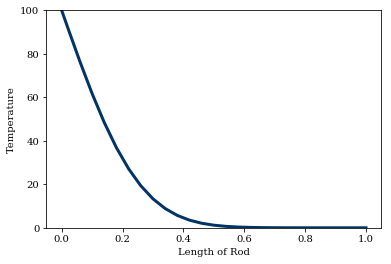

In [5]:
pyplot.plot(numpy.linspace(0,1,nx), T, color='#003366', ls='-', lw=3)
pyplot.ylim(0,100)
pyplot.xlabel('Length of Rod')
pyplot.ylabel('Temperature');

#### 3.2.1 Condições de contorno

No problema da barra acima, afirmamos que o lado esquerdo da haste é mantido a uma temperatura de $T = 100{\rm C}$. Este é um exemplo de uma *condição de contorno* (Boundary Condition - BC): uma regra que define como o problema interage com as bordas do domínio. Nesse caso, o domínio abrange o comprimento da haste, de $0 \leq x \leq 1$.

Existem vários tipos de condições de contorno (Dirichlet, Neumann, Robin, periódica...), mas iremos abordar aqui duas das mais utilizadas.

##### Condição de contorno de Dirichlet

* O valor de $\phi$ é especificado na fronteira. 

O exemplo da haste acima usa um *Dirichlet* BC no lado esquerdo. Condição de contorno de Dirichlet é aquele em que a borda é mantida em um valor específico da variável de solução.

E quanto à extremidade direita da haste $(x = 1)$? Na discretização que estabelecemos acima, o problema não evoluiu por tempo suficiente para o calor percorrer todo o comprimento da haste. Vamos aumentar o número de timesteps, `nt` e ver o que acontece.

In [6]:
nt = 1000
T = ftcs(Ti.copy(), nt, dt, dx, alpha)

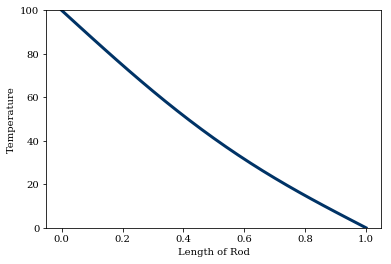

In [7]:
pyplot.plot(numpy.linspace(0,1,nx), T, color='#003366', ls='-', lw=3)
pyplot.ylim(0,100)
pyplot.xlabel('Length of Rod')
pyplot.ylabel('Temperature');

Hmmm ... parece que estamos colocando o BC do lado direito o valor $T = 0{\rm C}$, você concorda?
Agora estude o código para a função `ftbs`, acima, e tente descobrir o que acontece no ponto mais à direita da grade espacial.

Você descobriu?

O valor em `T [-1]` nunca atualiza! 
Esse valor é definido como zero na condição inicial e permanece assim durante toda a simulação. Nós efetivamente temos condições de contorno do tipo Dirichlet em *ambas* extremidades. O lado esquerdo da haste é mantido a uma temperatura de $T = 100{\rm C}$ e o lado direito é mantido em $T = 0{\rm C}$. Ambas as temperaturas finais são "fixas" definindo valores, a distribuição de temperatura dentro da haste convergirá (após tempo suficiente) para um gradiente de temperatura linear em todo o comprimento da haste.

![graphite-rod](./figuras/transmissao-calor-por-conducao.jpg)
#### <center> Figura 2.  Condução de calor e uma haste com temperatura fixa nas extremidades.

<div class="alert alert-info" role="alert">
 <p class="lead"> Quando a solução estiver em equilíbrio, nenhum número de *timesteps* extras fará com que ela seja alterada. Este é um exemplo de uma <font color=`blue`>*solução de estado estacionário*.
</div>

As condições de contorno de Dirichlet aparecem em muitas aplicações de engenharia, entre eles a termodinâmica (por exemplo, a definição de uma temperatura superficial) e a dinâmica do fluido (por exemplo, as condições de não deslizamento nas paredes em fluidos viscosos).

<div class="alert alert-warning">
<b>NOTA: </b> 

Em geral, não se deve aplicar condições de fronteira do tipo Direchlet, simultaneamente, nas fronteiras de entrada e de saída do escoamento a menos que se conheça a pressão real nessas fronteiras. Pode-se originar soluções fisicamente incorretas ou mesmo divergência do método numérico.
</div>

##### Condição de contorno de Neumann

Em problemas de dinâmica dos fluidos computacional, é muito comum resolvermos problemas que exigem condições de fronteira, em que a derivada normal (gradiente) da variável dependente é especificada na fronteira. 

* O gradiente normal $\frac{\partial \phi}{\partial n}=f$ ou tangencial $\frac{\partial \phi}{\partial s}=g$ é especificado na fronteira. Quando $f=0$, dizemos que a condição utilizada é uma __condição de fronteira natural__ ou __homogênia__. 

Por exemplo, quando temos uma parede adiabática, o fluxo de calor através dessa parede é zero:

\begin{equation}
q=k \frac{\partial T}{\partial n}=0,
\end{equation}
onde $n$ é a direção normal à parede.

Assim, uma vez que $k>0,$ um fluxo nulo de calor na parede implica

\begin{equation}
\frac{\partial T}{\partial n}=0.
\end{equation}

<div class="alert alert-success" role="alert">
Diferentemente da condição de Dirichlet, onde os valores de uma grandeza $\phi$ na fronteira são conhecidos, na condição de Neumann, apenas o gradiente normal de $\phi$ na fronteira é especificado. Assim, $\phi$ na fronteira também é uma incógnita que __deve ser determinada__ como parte do processo de solução.
</div>

### <span class="badge badge-pill badge-warning">_Pergunta:_</span> <font color='Orange'>Como podemos utilizar está condição de contorno no nosso problema da haste?</font>
    
### <span class="badge badge-pill badge-success">Resposta:</span> 
(Fortuna, página 121, 177) Supondo que a extremidade direita da haste ($x=1$) esteja termicamente isolada, de tal modo que não haja fluxo de calor através da extremidade da mesma:

\begin{equation}
\label{eq5}
\left. \frac{\partial T}{\partial x} \right|_{x=1} = 0
\tag{5}
\end{equation}

Utilizando o método de Euler explícito, juntamente com diferenças centrais de segunda ordem para a derivada espacial conforme apresentado nas equações \ref{eq3} e \ref{eq4}.

Note-se que como já discutido, temos que calcular o valor da varialvel $T$ no ponto $x=1$, e a expressão \ref{eq4}, faz referência à temperatura em $T^n_{N+1}$. Assim, para o cálcularmos o valor de $T$ na extremidade direita da haste dependemos de um valor $N+1$ que estará fora do nosso domínio. __Ponto fantasma.__

Para tratarmos este problema de ponto fantasma, podemos discretizar a condição de fronteira Eq. \ref{eq5} utilizando diferenças centrais de segunda ordem aplicadas ao ponto $x_N$:

\begin{equation}
\left. \frac{\partial T}{\partial x} \right|_{x=1} \approx \frac{T^n_{N+1} - T^n_{N-1}}{2\Delta x}=0
\end{equation}

Essa discretização implica que 

\begin{equation}
T^n_{N-1}=T^n_{N+1}.
\end{equation}

Pense no que a equação está dizendo: a mudança na temperatura ao se mover na direção $x$ é zero na borda mais à direita da haste. Isso significa que a temperatura deve ser igual nos dois últimos pontos da grade espacial.

Para reforçar essa condição de limite de Neumann na extremidade direita da haste, adicionamos a seguinte linha de código:

```Python
T[-1] = T[-2]
```

Ou seja, a temperatura no limite (`T [-1]`) é igual à temperatura diretamente à sua esquerda (`T [-2]`). O gradiente espacial é zero e uma condição de Neumann é satisfeita lá.

As condições de Dirichlet no exemplo da haste foram aplicadas sem nenhuma entrada extra, mas a condição Neumann exigirá uma atualização em cada iteração do loop.

Finalmente, os BCs de Dirichlet e Neumann às vezes podem ser misturados para representar melhor a física de um problema.

Vamos revisitar o problema da vara aquecida. Desta vez, a temperatura em $x = 0$ permanecerá fixa em $T = 100{\rm C}$ - essa é a condição de Dirichlet - e um Neumann BC se aplica a $x = 1$.

In [8]:
def ftcs_mixed(T, nt, dt, dx, alpha):
    """Solves the diffusion equation with forward-time, centered scheme using
    Dirichlet b.c. at left boundary and Neumann b.c. at right boundary
    
    Parameters:
    ----------
    u: array of float
        Initial temperature profile
    nt: int
        Number of time steps
    dt: float
        Time step size
    dx: float
        Mesh size
    alpha: float
        Diffusion coefficient (thermal diffusivity)
        
    Returns:
    -------
    u: array of float
        Temperature profile after nt time steps with forward in time scheme
    
    """
    for n in range(nt):  
        Tn = T.copy() 
        T[1:-1] = Tn[1:-1] + alpha*dt/dx**2*(Tn[2:] -2*Tn[1:-1] + Tn[0:-2])
        T[-1] = T[-2]
        
    return T

In [9]:
nt = 1000
T = ftcs_mixed(Ti.copy(), nt, dt, dx, alpha)

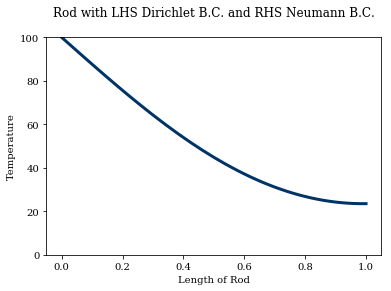

In [10]:
pyplot.plot(numpy.linspace(0,1,nx), T, color='#003366', ls='-', lw=3)
pyplot.ylim(0,100)
pyplot.title('Rod with LHS Dirichlet B.C. and RHS Neumann B.C.\n')
pyplot.xlabel('Length of Rod')
pyplot.ylabel('Temperature');

Agora o calor está se acumulando no domínio. Nosso isolador funciona! Se você aumentar ainda mais o número de timesteps `nt`, verá que a temperatura de saída em $x = 1$ continua a aumentar.

Fortuna 113 - problema discretização explícita




#### 3.2.2 Esquemas explícitos e condições de contorno

Os esquemas numéricos que aprendemos até agora são chamados _explícitos_, porque calculamos a solução atualizada em $t^{n + 1}$ usando apenas informações conhecidas no tempo $t^n$. Isto é simples, mas tem limitações, particularmente com os pequenos tamanhos de tempo necessários para obter estabilidade.

Aqui está outro problema com esquemas explícitos. A Figura 3 mostra o estêncil sobreposto de vários pontos da malha em três etapas de tempo calculadas usando o esquema já apresentado anteriormente. Sabemos que para calcular $T_i^{n + 1}$ utilizamos as informações dos pontos de grade $i-1, i, i + 1$ no passo de tempo anterior. Pense no que acontece na fronteira: qualquer alteração na condição de fronteira alimentará a solução apenas na próxima etapa, não imediatamente. Mas isso contradiz a física do problema, pois qualquer mudança na fronteira deve ser sentida imediatamente sob a equação de difusão. Para incluir efeitos de fronteira no mesmo nível de tempo, podemos usar uma atualização implícita (assunto da próxima lição).

![explicitFTCS-BCeffect](./figuras/explicitFTCS-BCeffect.png)
#### <center> Figura 3. Propagação da condição de contornoem uma discretização explícita.

In [11]:
from IPython.core.display import HTML
css_file = '../styles/custom.css'
HTML(open(css_file, "r").read())